# Text classification
## 20 newsgroups dataset
### Набір даних 20 груп новин містить близько 18000 публікацій груп новин на 20 тем, розділених на дві підмножини: одна для навчання (або розвитку) та друга для тестування (або для оцінки ефективності). Датасет став популярним набором даних для експериментів у текстових програмах машинного навчання, таких як класифікація тексту та кластеризація тексту.
### Виконані всіх вимоги до завдання, а саме:
* accuracy_score
* classification_report
* confusion_matrix
## Імпортуємо бібліотеки

In [1]:
from sklearn import datasets
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import pandas as pd
import numpy as np
from numpy import log
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anast\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Дістаємо дані з датасету

In [2]:
news_train_subset = datasets.fetch_20newsgroups(subset='train')
news_test_subset = datasets.fetch_20newsgroups(subset='test') 
print(list(news_train_subset.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


## Аналіз та підготовка даних

In [3]:
# Exploration
print("\n".join(news_train_subset.data[0].split('\n')[:]))
print(news_train_subset.target_names[news_train_subset.target[0]])
print("Кількість документів у нашому сабсеті")
print(len(news_train_subset.data))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





rec.autos
Кількість документів у нашому сабсеті
11314


Термін **"stop words"** - зазвичай стосується найпоширеніших слів у мові , що використовує більшість документів. 

Фільтрування їх зменшує розмір цільової лексики, але може завдати шкоди при виконанні пошуку потрібної нам фрази.


In [4]:
myStopWords = list(string.punctuation) + stopwords.words('english')


## Використання CountVectorizer зі sklearn для отримання фічей з навчальних даних

In [5]:
CV = TfidfVectorizer(max_features=3000,stop_words=myStopWords)

In [6]:
xtrain = CV.fit_transform(news_train_subset.data)

xtrain = xtrain.toarray()
ytrain = news_train_subset.target

#Transforming xtest and ytest
xtest = (CV.transform(news_test_subset.data)).toarray()
ytest = news_test_subset.target

## Поглянемо на список фічей

In [7]:
CV.get_feature_names()

['00',
 '000',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '0d',
 '0q',
 '0t',
 '10',
 '100',
 '1000',
 '11',
 '12',
 '120',
 '128',
 '129',
 '13',
 '130',
 '14',
 '145',
 '147',
 '15',
 '150',
 '16',
 '17',
 '18',
 '19',
 '1920',
 '1982',
 '1983',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1993apr14',
 '1993apr15',
 '1993apr16',
 '1993apr19',
 '1993apr20',
 '1993apr5',
 '1993apr6',
 '1d9',
 '1st',
 '1t',
 '20',
 '200',
 '2000',
 '21',
 '22',
 '23',
 '24',
 '241',
 '24e',
 '25',
 '250',
 '256',
 '26',
 '27',
 '28',
 '286',
 '29',
 '2d',
 '2di',
 '2nd',
 '2tm',
 '30',
 '300',
 '301',
 '31',
 '32',
 '33',
 '34',
 '34u',
 '35',
 '36',
 '37',
 '38',
 '386',
 '39',
 '3d',
 '3dy',
 '3l',
 '3rd',
 '3t',
 '40',
 '400',
 '408',
 '41',
 '415',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '486',
 '49',
 '4t',
 '50',
 '500',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '5u',
 '60',
 '600',
 '61',
 '617',
 '62',
 '63',
 '64',
 '65',
 '650',
 

## Використання Sklearn Multinomial Naive Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(xtrain,ytrain)
ypred_sk = clf.predict(xtest)

## Кастомний Multinomial Naive Bayes

* функція для створення навчального словника з текстових файлів для навчального набору даних

In [9]:
def model(X,Y):
    store = {}
    classes = list(set(Y))
    store['classes'] = len(classes)
    store["total"] = len(Y)
    for c in classes:
        store[c] = {}
        currentRows = Y==c
        currentClassX = X[currentRows]
        tempSum = 0
        for f in range(X.shape[1]):
            store[c][f] = (currentClassX[:,f]!=0).sum()
            tempSum += store[c][f]
        store[c]['total'] = len(currentClassX)
    return store

* функція для обчислення naive bayesian log probablity для кожного тестового документа, що знаходиться в певному класі

In [10]:
def classProbability(X,c,model):
    p = log(model[c]['total']) - log(model['total'])
    for f in range(X.shape[0]):
        if(X[f]!=0):
            numerator = model[c][f]+1
            denominator = model[c]['total'] + X.shape[0]
            p += log(numerator)-log(denominator)
    return p

* predict функція, яка прогнозує клас або лейбл тестових документів за допомогою тренувального словника, зробленого за допомогою функції fit 

Time of code running depends on bestP value. Change to lower to rub faster

In [11]:
def predict(X,model):
    pred = []
    for t in X:
        bestP = -9999
        bestC = 0
        for f in range(model['classes']):
            tempP = classProbability(t,f,model)
            if( tempP > bestP):
                bestP=tempP
                bestC=f
        pred.append(bestC)
    return pred     

In [12]:
D = model(xtrain,ytrain)
ypred = predict(xtest,D)
ypred_Train = predict(xtrain,D)

## Результати

### Sklearn результати

In [13]:
print("Using Sklearn")
print("score of train : ", clf.score(xtrain,ytrain))
print("score of test : ", clf.score(xtest,ytest))
print("Classification Report : ")
print(classification_report(ytest,ypred_sk,target_names=news_test_subset.target_names))
print("Confusion Matrix : ")
pd.DataFrame(confusion_matrix(ytest,ypred_sk))

Using Sklearn
score of train :  0.8884567792115963
score of test :  0.7623473181093999
Classification Report : 
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.66      0.69       319
           comp.graphics       0.62      0.70      0.66       389
 comp.os.ms-windows.misc       0.68      0.73      0.70       394
comp.sys.ibm.pc.hardware       0.63      0.67      0.65       392
   comp.sys.mac.hardware       0.76      0.70      0.73       385
          comp.windows.x       0.79      0.75      0.77       395
            misc.forsale       0.76      0.84      0.80       390
               rec.autos       0.78      0.82      0.80       396
         rec.motorcycles       0.81      0.89      0.85       398
      rec.sport.baseball       0.84      0.86      0.85       397
        rec.sport.hockey       0.89      0.93      0.91       399
               sci.crypt       0.91      0.87      0.89       396
         sci.electronics     

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,211,2,1,1,0,0,0,5,7,3,2,1,1,4,1,55,6,5,2,12
1,3,271,15,12,10,30,6,5,1,6,1,5,11,2,5,2,2,1,0,1
2,0,35,289,32,5,13,1,1,6,2,0,2,1,1,5,1,0,0,0,0
3,0,12,33,263,27,4,18,4,1,3,0,0,22,0,5,0,0,0,0,0
4,0,7,22,37,269,5,21,2,1,4,0,1,11,2,3,0,0,0,0,0
5,1,38,28,3,2,297,5,1,3,4,0,2,3,2,4,0,2,0,0,0
6,0,3,4,26,9,1,329,7,3,0,4,1,2,1,0,0,0,0,0,0
7,2,5,1,2,2,3,11,324,17,1,2,0,11,2,9,0,2,0,2,0
8,0,1,0,1,0,0,5,21,356,4,1,1,3,1,0,1,2,0,1,0
9,0,2,0,0,1,1,9,7,1,342,24,1,2,1,3,0,3,0,0,0


### Результати кастомної реалізації

In [14]:
print("Using custom implementation")
print("score of train : ", accuracy_score(ytrain,ypred_Train))
print("score of test : ", accuracy_score(ytest,ypred))
print("Classification Report : ")
print(classification_report(ytest,ypred,target_names=news_test_subset.target_names))
print("Confusion Matrix : ")
pd.DataFrame(confusion_matrix(ytest,ypred))

Using custom implementation
score of train :  0.7386423899593424
score of test :  0.5813860860329262
Classification Report : 
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.37      0.50       319
           comp.graphics       0.75      0.32      0.45       389
 comp.os.ms-windows.misc       0.70      0.27      0.39       394
comp.sys.ibm.pc.hardware       0.55      0.59      0.57       392
   comp.sys.mac.hardware       0.88      0.34      0.49       385
          comp.windows.x       0.69      0.72      0.71       395
            misc.forsale       0.92      0.52      0.67       390
               rec.autos       0.83      0.60      0.70       396
         rec.motorcycles       0.95      0.63      0.76       398
      rec.sport.baseball       0.96      0.44      0.61       397
        rec.sport.hockey       0.78      0.94      0.85       399
               sci.crypt       0.26      0.96      0.40       396
         sci.el

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,117,0,0,0,0,1,0,0,0,0,3,24,0,0,0,111,17,46,0,0
1,1,125,10,14,2,49,1,2,0,0,0,146,1,2,16,3,6,9,2,0
2,0,10,107,61,1,52,0,0,0,1,0,138,0,3,10,1,6,3,1,0
3,1,4,8,232,5,9,2,2,0,0,1,103,2,2,11,2,5,3,0,0
4,0,5,16,62,130,4,6,3,1,1,2,108,1,2,21,2,7,14,0,0
5,1,10,7,8,0,285,0,0,0,0,1,66,0,0,8,2,2,5,0,0
6,0,1,1,31,8,0,204,13,1,1,8,50,3,1,24,3,17,19,5,0
7,0,2,0,1,0,0,3,236,10,3,4,40,2,5,25,2,46,13,4,0
8,0,1,0,1,0,0,1,17,250,0,2,32,0,2,4,2,55,30,1,0
9,0,0,0,0,1,0,0,3,1,176,82,39,0,5,10,8,47,21,4,0


## Візуалізація обчислень для кастомної та scklearn реалізації 

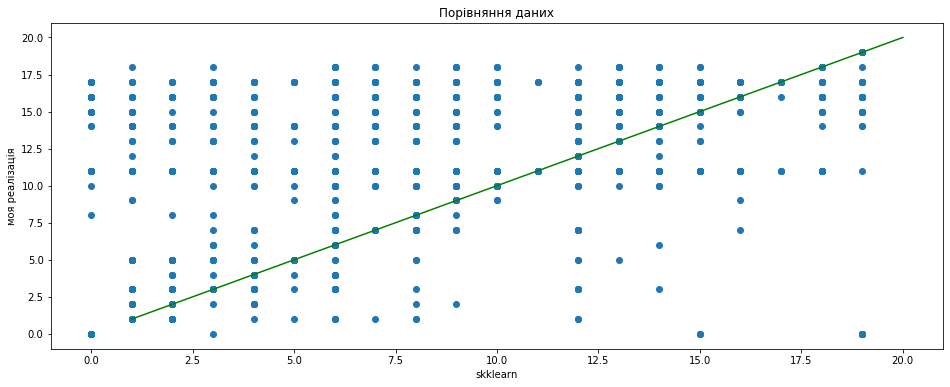

In [16]:
import matplotlib.pyplot as plt
import numpy as np
x=[1,20]
y=[1,20]
y_pred_sklearn=ypred_sk
y_pred_scratch=ypred
plt.figure(figsize=(16,6))
plt.scatter(y_pred_sklearn,y_pred_scratch)
plt.ylabel("моя реалізація")
plt.xlabel("skklearn")
plt.title("Порівняння даних")
plt.plot(x,y,'g')
plt.show()